# Objetivo do projeto

O objetivo deste projeto é desenvolver um modelo preditivo de preços de aluguéis em Nova Iorque, avaliando tal modelo utilizando as métricas que mais fazem sentido para este problema.

Para tal, é fornecido um dataset com diversas informações e preços de alguns imóveis da região de interesse.

# Importando as bibliotecas previamente instaladas

Como primeiro passo da análise, importou-se algumas das bibliotecas instaladas que serão utilizadas na resolução deste desafio, conforme o código abaixo.

In [1]:
# Libs de manipulação dos dados
import numpy as np
import pandas as pd

# Libs de visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Ajusto do estilo dos gráficos

Antes de iniciar qualquer análise, define-se aqui um estilo presente na biblioteca Seaborn para todos os gráficos deste relatório, a fim de o tornar mais padronizado e esteticamente mais apresentável.

In [18]:
sns.set(style = 'darkgrid')

# Carregando o dataset

Feitas as devidas importações, agora é possível importar o dataset disponibilizado. Para tal, utilizou-se da biblioteca pandas, fazendo a leitura do arquivo csv, e salvando-o em uma variável declarada 'df', conforme segue.

In [2]:
df = pd.read_csv('dataset/teste_indicium_precificacao.csv')

Exibindo as primeiras 5 linhas do dataset,

In [3]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Para fins de facilitar a busca de algumas informações, copiou-se a descrição de cada uma das colunas do dataset, conforme foi disponibilizado previamente.

id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

nome - Representa o nome do anúncio

host_id - Representa o id do usuário que hospedou o anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

bairro_group - Contém o nome do bairro onde o anúncio está localizado

bairro - Contém o nome da área onde o anúncio está localizado

latitude - Contém a latitude do local

longitude - Contém a longitude do local

room_type – Contém o tipo de espaço de cada anúncio

price - Contém o preço por noite em dólares listado pelo anfitrião

minimo_noites - Contém o número mínimo de noites que o usuário deve reservar

numero_de_reviews - Contém o número de comentários dados a cada listagem

ultima_review - Contém a data da última revisão dada à listagem

reviews_por_mes - Contém o número de avaliações fornecidas por mês

calculado_host_listings_count - Contém a quantidade de listagem por host

disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

# Análise Descritiva

Exibindo mais infos do dataset,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Avaliando as informações acima retornadas, o primeiro ponto a ser observado é que nem todas as colunas estão totalmente preenchidas com dados. Isto fica evidente pois temos 48894 entradas, e algumas não tem essa quantidade de dados não nulos. Outra forma de se visualizar isto é utilizando a linha de código abaixo, que irá verificar por coluna todas as linhas do data frame em busca de dados nulos e somá-los.

In [5]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Exibindo os dados em forma de tabela, com a porcentagem de dados nulos por coluna,

In [7]:
# definindo um data frame com a quantidade de dados nulos por coluna
missing_data = (
    df.isnull()
    .sum()
    .to_frame('missing_count')
)

# adicionando ao data frame uma coluna com a quantidade de dados nulos por coluna divido pela quantidade total de dados
missing_data = missing_data.join(((df.isnull().sum())/(df.shape[0])).to_frame('missing_pct'))

# formando a coluna 'missing_pct' para exibir os resultados com duas casas decimais e no formato de porcentagem
missing_data.style.format('{:.2%}', subset = 'missing_pct')

,missing_count,missing_pct
id,0,0.00%
nome,16,0.03%
host_id,0,0.00%
host_name,21,0.04%
bairro_group,0,0.00%
bairro,0,0.00%
latitude,0,0.00%
longitude,0,0.00%
room_type,0,0.00%
price,0,0.00%


Como primeira análise, tem-se que a quantidade relativa de dados nulos das colunas 'nome' e 'host_name' são bem pequenas. Contudo, para as colunas 'ultima_review' e 'reviews_por_mes', as quantidades são relativamentes altas, com 20,56% de dados nulos em cada uma. Este ponto dos dados nulos será mais profundamente tratado na sessão de modelagem destre projeto (arquivo 'Modelling.ipynb'), pois interfere diretamente nas performances dos modelos.

Outro ponto importante a respeito da coluna 'ultima_review' é que, segundo as informações, se trata de uma coluna com dados de datas. Contudo, estes dados estão salvos no dataset como tipo 'object', ou seja, texto. Isto fica mais claro ao exibir alguns dados desta coluna, demonstrados abaixo. 

In [8]:
df['ultima_review']

0        2019-05-21
1               NaN
2        2019-07-05
3        2018-11-19
4        2019-06-22
            ...    
48889           NaN
48890           NaN
48891           NaN
48892           NaN
48893           NaN
Name: ultima_review, Length: 48894, dtype: object

Observa-se um 'dtype' como object, com entradas de texto '2019-05-21' e assim por diante. Portanto, se torna necessário converter estes dados para tipo data, a fim de avaliá-los de forma mais coerente. Para fazer isto, utilizou-se uma função da biblioteca pandas .to_datime, conforme demonstrado abaixo.

Obs: não foi passado o argumento 'format' dentro da função pois as strings a serem convertidas da coluna 'ultima_review' já estão no formato padrão Ano-mês-dia.

In [14]:
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

In [15]:
df['ultima_review']

0       2019-05-21
1              NaT
2       2019-07-05
3       2018-11-19
4       2019-06-22
           ...    
48889          NaT
48890          NaT
48891          NaT
48892          NaT
48893          NaT
Name: ultima_review, Length: 48894, dtype: datetime64[ns]

Conforme o resultado acima, percebe-se que os dados agora estão no formato certo.

## Estatísticas descritivas

Seguindo com as análises, partiu-se agora para as estatísticas descritivas das colunas numéricas do dataset. Para avaliar isto, utilizou-se da função describe, excluindo as colunas 'id' e 'host_id' (com a função drop) pois estas são somente códigos de identificação, não contribuindo com informações relevantes para o entendimento do problema.

In [17]:
df.drop(columns = ['id', 'host_id']).describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Começando a avaliação destes resultados pela coluna 'alvo' que seria o preço de aluguel dos imóveis, percebe-se que 75% dos dados estão concentrados na faixa até 175 dólares/noite. Contudo, temos um valor máximo para este coluna de $10.000,00, indicando claramente um outlier, ou seja, um valor muito acima de onde estão a maior quantidade de dados. Para avaliar isto de forma mais clara, plotou-se o histograma abaixo, utilizando a biblioteca Seaborn, com os dados desta coluna.

OBS: dentro da função de plotagem histplot() definiu-se o argumento kde = True para que fosse plotada também a curva de densidade de distribuição dos dados.

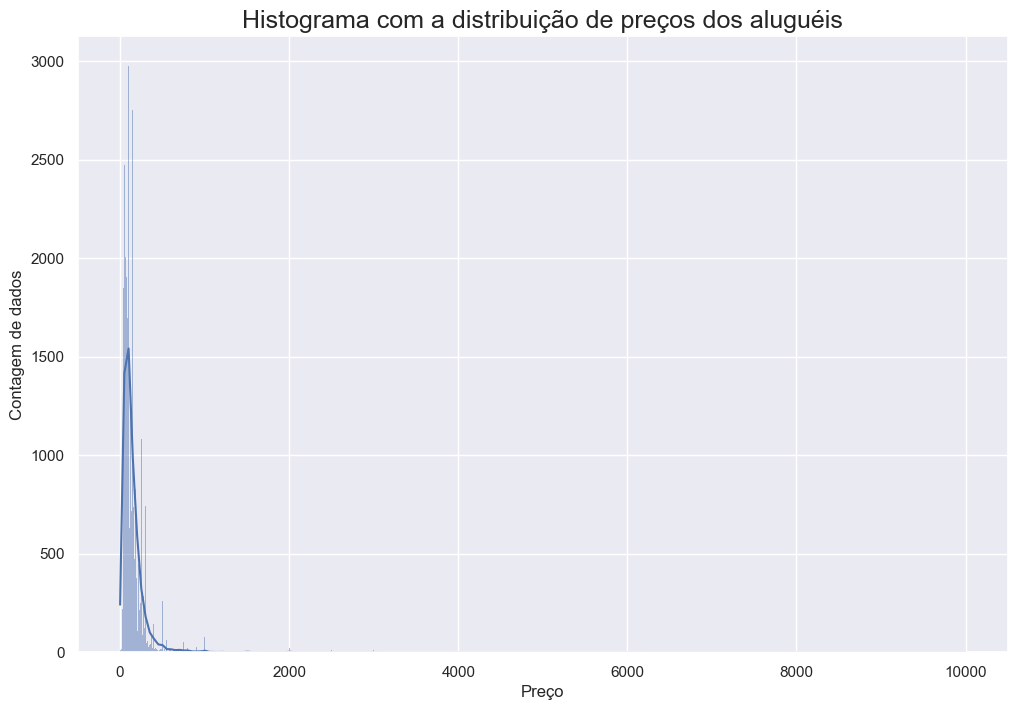

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(
    data = df,
    x = 'price',
    kde = True
)
plt.title('Histograma com a distribuição de preços dos aluguéis', fontsize = 18)
plt.xlabel('Preço', fontsize = 12)
plt.ylabel('Contagem de dados', fontsize = 12);